In [1]:
from tqdm import tqdm
from collections import Counter
from matplotlib import pyplot as plt
from scipy.signal import medfilt

from time import time_ns

### Let's see that for integer numbers: $$hash(x) = x\ mod\ Q$$, where $$Q=2^{61}-1$$

In [36]:
Q = 2**61 - 1
print(hash(Q))
print(hash(2*Q))
print(hash(3*Q))

0
0
0


### We will add Q, 2Q, 3Q, ... into dictionary and measure the time:

In [56]:
time_window = 2**10 - 1
def test(Q, N):
    d = {}
    p = Q
    times = []
    for i in tqdm(range(N)):
        if i & time_window == 0:
            if i > 0:
                times.append((time_ns() - t) / 10**9)
            t = time_ns()
        d[p] = 0
        p += Q
    return d, times

### First let us try without collistions:

100%|███████████████████████████████████████████████████████████████████| 5000000/5000000 [00:02<00:00, 1852186.29it/s]


3.40613 seconds
249 ns ± 16.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


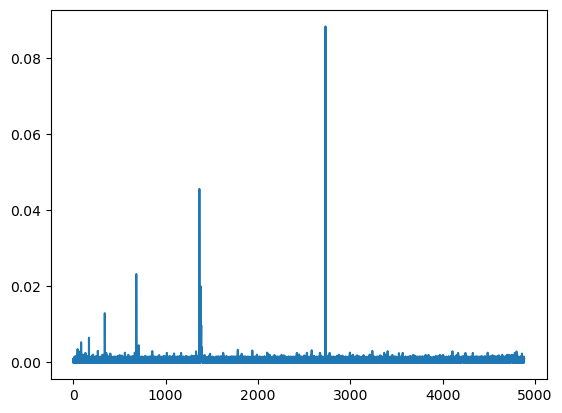

In [52]:
Q = 2**61 # - 1
N = 5 * 10**6
d, times = test(Q, N)    
print(f'{sum(times):.5f} seconds')
plt.plot(times)
%timeit d[Q * (N-1)]

### Now with collistions:

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:35<00:00, 1414.17it/s]


34.21092 seconds
1.48 ms ± 393 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


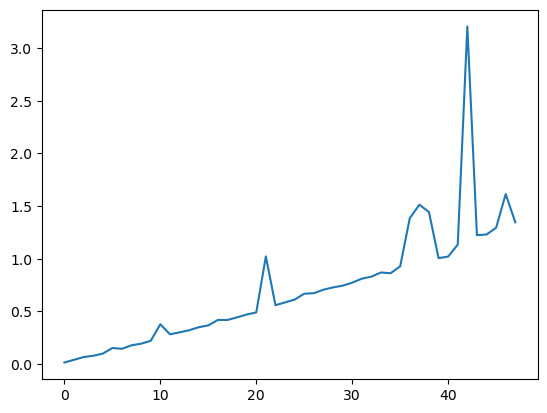

In [58]:
Q = 2**61 - 1
N = 5 * 10**4 # smaller N not to wait for ages
d, times = test(Q, N)    
print(f'{sum(times):.5f} seconds')
plt.plot(times)
%timeit d[Q * (N-1)]